# Clasificación de flores IRIS

In [75]:
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt

In [76]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [77]:
X = iris.data[:, :2]
X_cols = iris.feature_names[:2]
Y = iris.target

In [78]:
#Para determinar los límites en una representación
x_min, x_max = X[:, 0]. min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1]. min()-1, X[:, 1].max()+1
h = (x_max - x_min)/100

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

X_plot = np.c_[xx.ravel(), yy.ravel()]
X_plot

array([[3.3  , 1.   ],
       [3.356, 1.   ],
       [3.412, 1.   ],
       ...,
       [8.732, 5.368],
       [8.788, 5.368],
       [8.844, 5.368]])

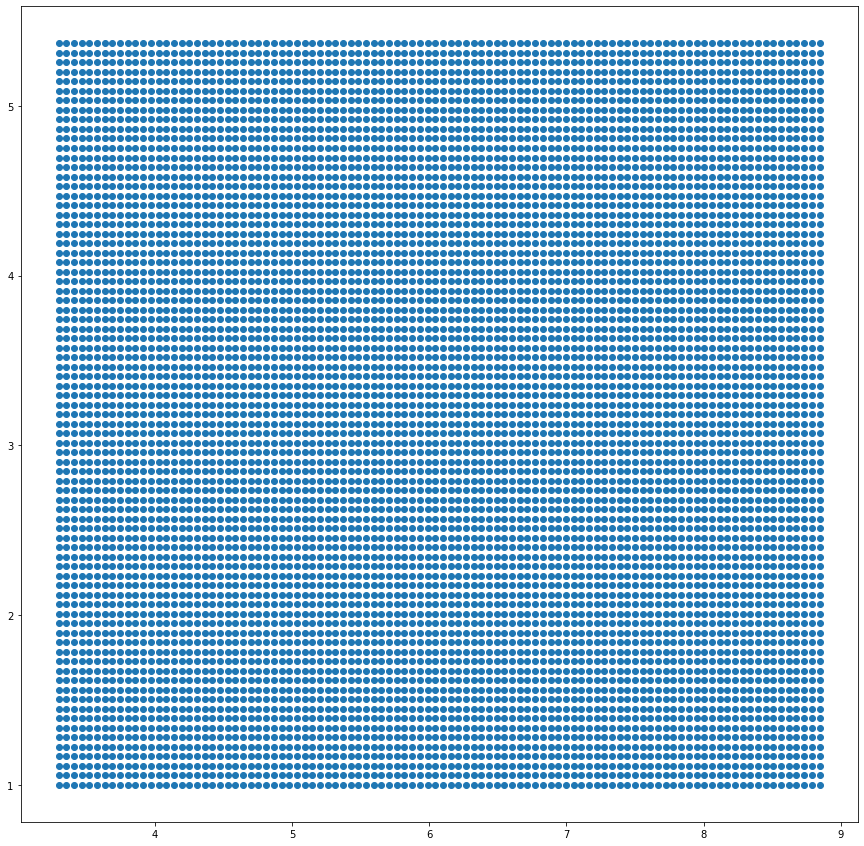

In [79]:
plt.figure(figsize = (15, 15))
plt.scatter(X_plot[:, 0], X_plot[:, 1])

In [80]:
C = 1.0
svc = svm.SVC(kernel = 'linear', C = C, decision_function_shape = 'ovr').fit(X, Y)
Y_pred = svc.predict(X_plot).reshape(xx.shape)

Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel Lineal')

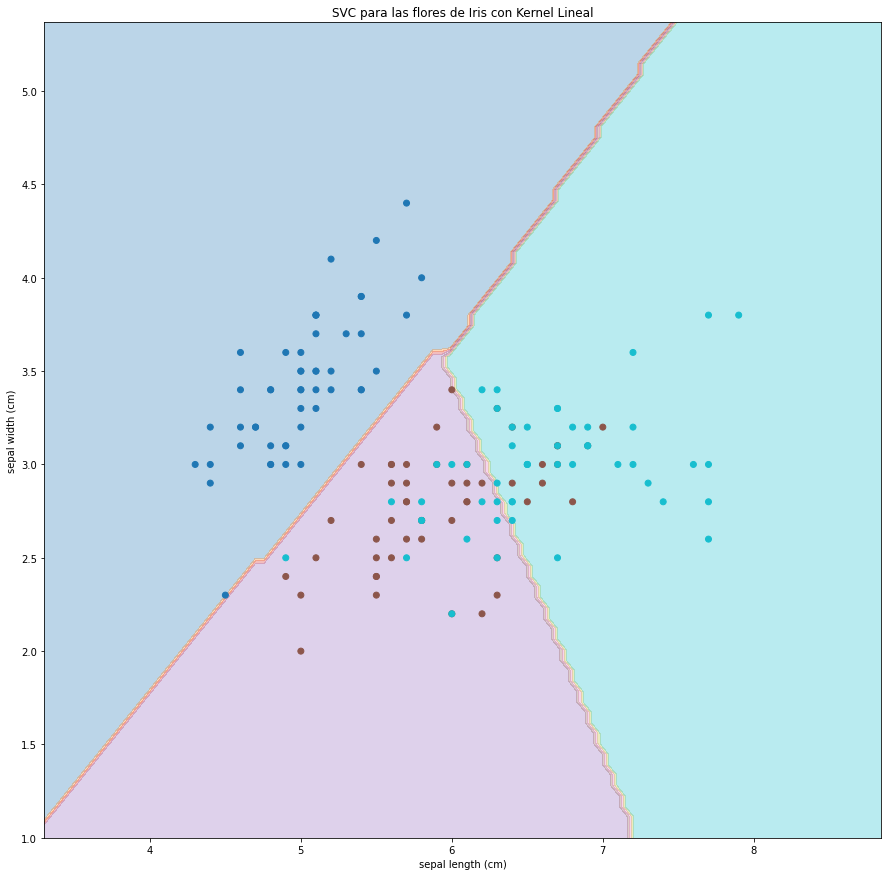

In [81]:
plt.figure(figsize = (15, 15))
plt.contourf(xx, yy, Y_pred, cmap = plt.cm.tab10, alpha = 0.3)
plt.xlabel(X_cols[0])
plt.ylabel(X_cols[1])
plt.scatter(X[:, 0], X[:, 1], c = Y, cmap = plt.cm.tab10)
plt.title('SVC para las flores de Iris con Kernel Lineal')

In [82]:
C = 1.0
svc = svm.SVC(kernel = 'rbf', C = C, decision_function_shape = 'ovr').fit(X, Y)
Y_pred = svc.predict(X_plot).reshape(xx.shape)

Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel Radial')

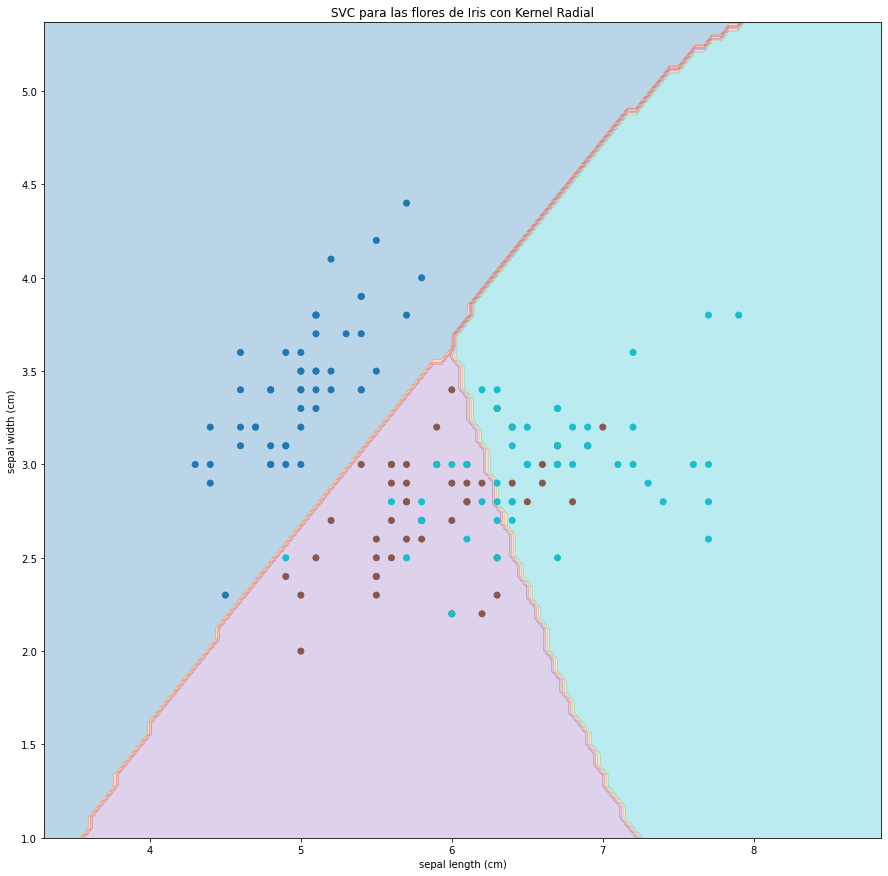

In [83]:
plt.figure(figsize = (15, 15))
plt.contourf(xx, yy, Y_pred, cmap = plt.cm.tab10, alpha = 0.3)
plt.xlabel(X_cols[0])
plt.ylabel(X_cols[1])
plt.scatter(X[:, 0], X[:, 1], c = Y, cmap = plt.cm.tab10)
plt.title('SVC para las flores de Iris con Kernel Radial')

In [84]:
C = 1.0
svc = svm.SVC(kernel = 'sigmoid', C = C, decision_function_shape = 'ovr').fit(X, Y)
Y_pred = svc.predict(X_plot).reshape(xx.shape)

Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel Sigmoide')

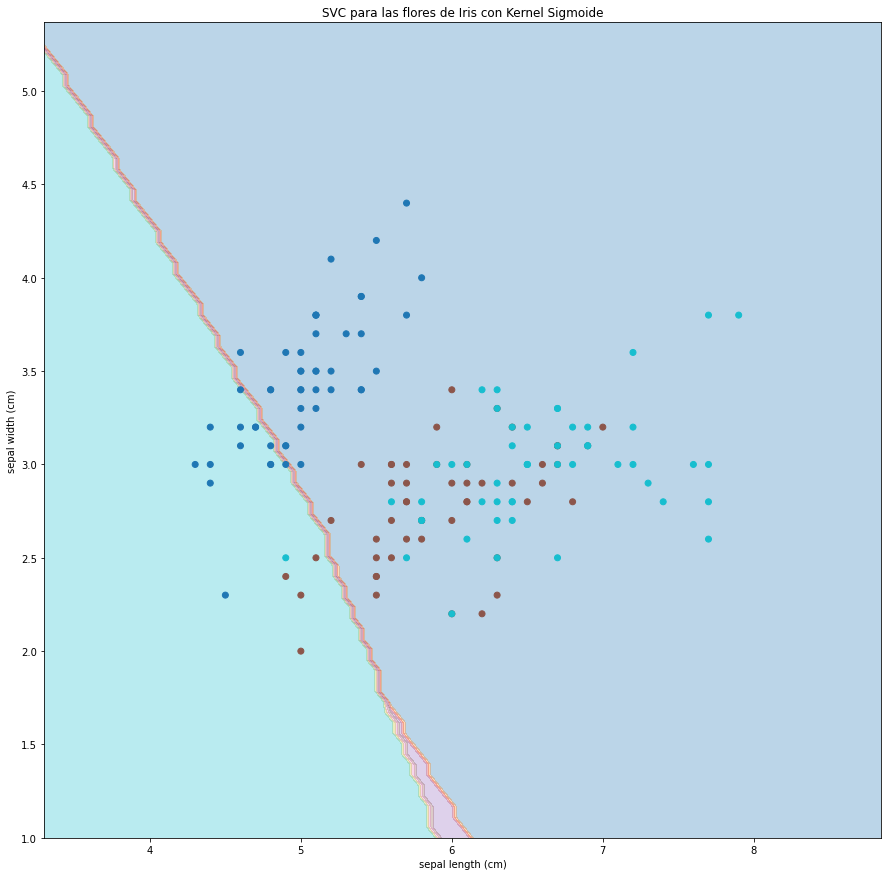

In [85]:
plt.figure(figsize = (15, 15))
plt.contourf(xx, yy, Y_pred, cmap = plt.cm.tab10, alpha = 0.3)
plt.xlabel(X_cols[0])
plt.ylabel(X_cols[1])
plt.scatter(X[:, 0], X[:, 1], c = Y, cmap = plt.cm.tab10)
plt.title('SVC para las flores de Iris con Kernel Sigmoide')

In [86]:
C = 1.0
svc = svm.SVC(kernel = 'poly', C = C, decision_function_shape = 'ovr').fit(X, Y)
Y_pred = svc.predict(X_plot).reshape(xx.shape)

Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel Polinomial')

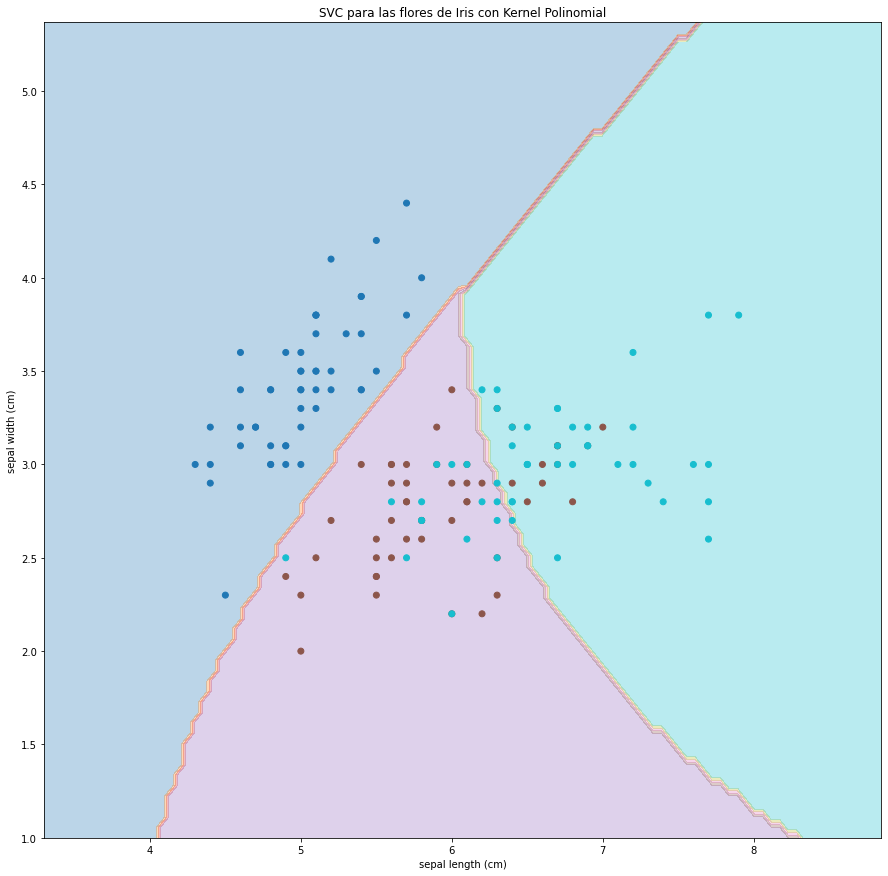

In [87]:
plt.figure(figsize = (15, 15))
plt.contourf(xx, yy, Y_pred, cmap = plt.cm.tab10, alpha = 0.3)
plt.xlabel(X_cols[0])
plt.ylabel(X_cols[1])
plt.scatter(X[:, 0], X[:, 1], c = Y, cmap = plt.cm.tab10)
plt.title('SVC para las flores de Iris con Kernel Polinomial')

In [88]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

In [89]:
#En este dataset resulta que los 50 primeros son de un tipo de flor, los 50 segundos de otro y los 50 últimos de otro, por lo que conviene barajarlos (shuffle)
X, Y = shuffle(X, Y, random_state = 0)

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [91]:
parameters = [
              {
                  'kernel': ['rbf'], 
                  'gamma' : [1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.5],
                  'C'     : [1, 10, 100, 1000]
              },
              {
                  'kernel': ['linear'],
                  'C'     : [1, 10, 100, 1000]
              }
]

In [92]:
clf = GridSearchCV(svm.SVC(decision_function_shape = 'ovr'), parameters, cv = 5)
clf.fit(X, Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [93]:
clf.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [94]:
#Todos estos valores son las medias y desviaciones típicas de los scores para cada caso
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']
for m, s, p in zip(means, stds, params):
  print('%0.3f (+/-%0.3f) para %r' % (m, s, p))

0.747 (+/-0.062) para {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.747 (+/-0.062) para {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.747 (+/-0.062) para {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.807 (+/-0.065) para {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.787 (+/-0.062) para {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.780 (+/-0.058) para {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.747 (+/-0.062) para {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.747 (+/-0.062) para {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.813 (+/-0.062) para {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.773 (+/-0.049) para {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.780 (+/-0.058) para {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.767 (+/-0.063) para {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.747 (+/-0.062) para {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.813 (+/-0.062) para {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.760 (+/-0.053) para {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.780 (+/-0.040) para {'C': 100, 'gamma'

In [95]:
Y_pred = clf.predict(X_test)

In [96]:
print(classification_report(Y_test, Y_pred, target_names = iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.60      0.82      0.69        11
   virginica       0.83      0.62      0.71        16

    accuracy                           0.79        38
   macro avg       0.81      0.81      0.80        38
weighted avg       0.81      0.79      0.79        38



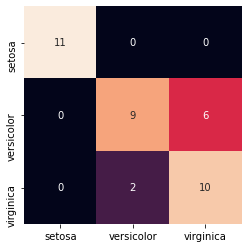

In [97]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y_test, Y_pred)
import seaborn as sns
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, xticklabels = iris.target_names, yticklabels = iris.target_names)

#Resumen final de la clasificación de Iris

In [113]:
def svm_iris(C = 1.0, gamma = 0.01, kernel = 'rbf'):

  import pandas as pd
  import numpy as np
  from sklearn import svm, datasets
  import matplotlib.pyplot as plt

  iris = datasets.load_iris()

  X = iris.data[:, :2]
  X_cols = iris.feature_names[:2]
  Y = iris.target

  x_min, x_max = X[:, 0]. min()-1, X[:, 0].max()+1
  y_min, y_max = X[:, 1]. min()-1, X[:, 1].max()+1
  h = (x_max - x_min)/100

  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  X_plot = np.c_[xx.ravel(), yy.ravel()]

  svc = svm.SVC(kernel = kernel, C = C, gamma = gamma, decision_function_shape = 'ovr').fit(X, Y)
  Y_pred = svc.predict(X_plot).reshape(xx.shape)
  plt.figure(figsize = (15, 15))
  plt.contourf(xx, yy, Y_pred, cmap = plt.cm.tab10, alpha = 0.3)
  plt.xlabel(X_cols[0])
  plt.ylabel(X_cols[1])
  plt.scatter(X[:, 0], X[:, 1], c = Y, cmap = plt.cm.tab10)
  plt.title('SVC para las flores de Iris con Kernel ' + kernel.upper())

In [99]:
from ipywidgets import interact, fixed

In [114]:
interact(svm_iris, C = [0.01, 0.1, 1, 10, 100, 1000, 1e6, 1e10], 
         gamma = [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.5, 0.99], 
         kernel = ['rbf', 'linear','sigmoid', 'poly', 'precomputed'])

interactive(children=(Dropdown(description='C', index=2, options=(0.01, 0.1, 1, 10, 100, 1000, 1000000.0, 1000…

<function __main__.svm_iris>